# Business Understanding

## Project Domain

## Problem Statements

## Goals

## Solution Statements

# Data Understanding

## Import data dari kaggle

In [145]:
from google.colab import files
files.upload()

{}

In [146]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [147]:
!kaggle datasets download -d mrsimple07/remote-work-productivity

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/remote-work-productivity
License(s): apache-2.0
remote-work-productivity.zip: Skipping, found more recently modified local copy (use --force to force download)


In [148]:
!mkdir remote-work-productivity
!unzip remote-work-productivity.zip -d remote-work-productivity
!ls remote-work-productivity

mkdir: cannot create directory ‘remote-work-productivity’: File exists
Archive:  remote-work-productivity.zip
replace remote-work-productivity/remote_work_productivity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: remote_work_productivity.csv


## Import Library yang dibutuhkan

In [149]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

## Exploratory Data Analysis

In [150]:
df = pd.read_csv('/content/remote-work-productivity.zip')
df.head()

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74


Data Preparation

In [151]:
df_encode = pd.DataFrame(df)

In [152]:
df.drop(columns=['Employee_ID'], inplace=True)

In [154]:
df.head()

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,Remote,29,75,78
1,In-Office,45,49,47
2,Remote,34,74,89
3,Remote,25,81,84
4,Remote,50,70,74


In [155]:
# Pisahkan fitur dan target
X = df_encode.drop(columns=['Employment_Type'])
y = df_encode['Employment_Type']

In [156]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [157]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [158]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [174]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [175]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [176]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842 (3.29 KB)

 Trainable params: 842 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

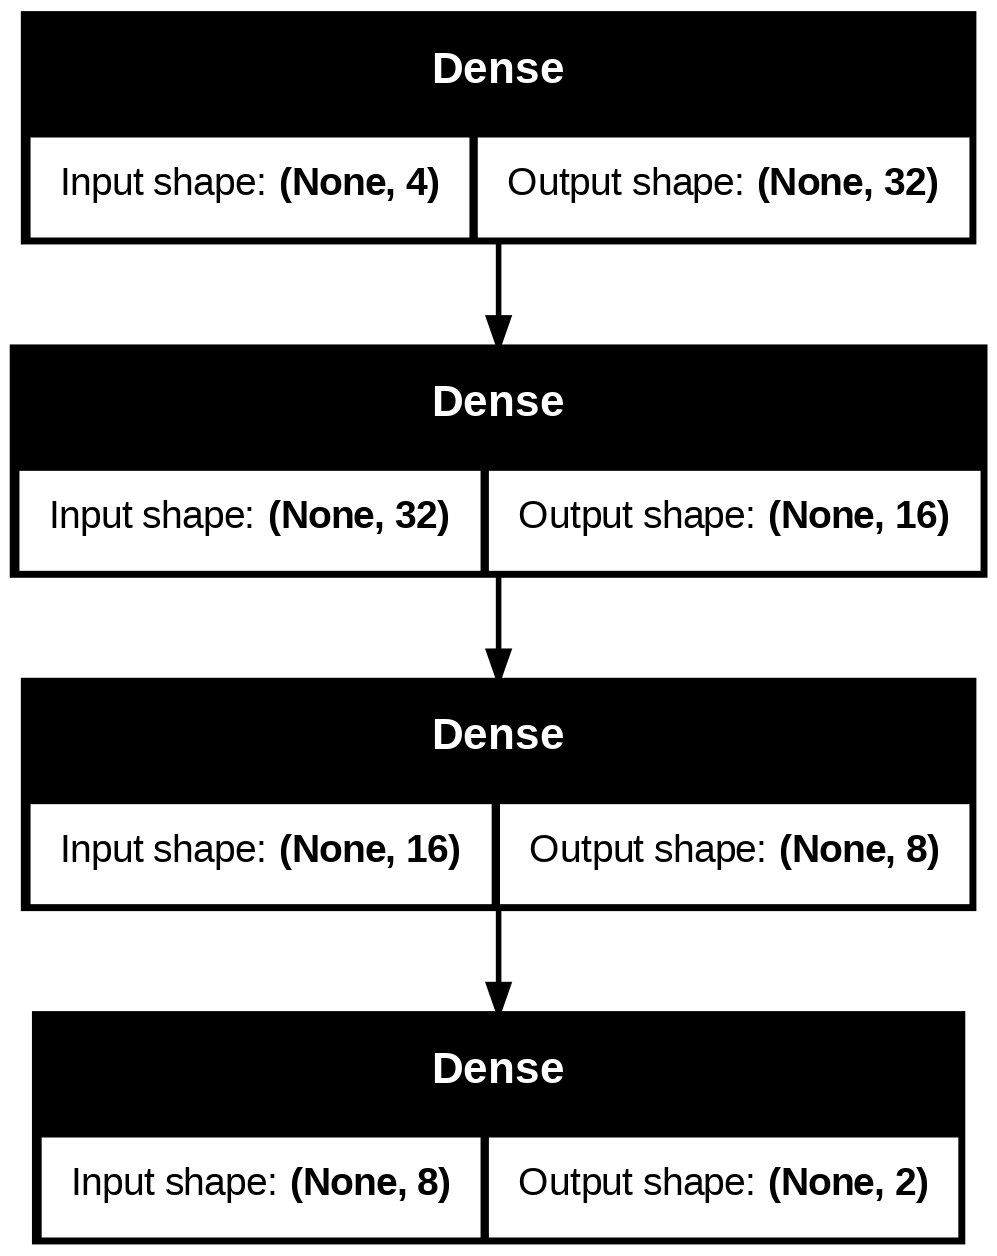

In [177]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [178]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5457 - loss: 0.6896 - val_accuracy: 0.7900 - val_loss: 0.6581
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8054 - loss: 0.6391 - val_accuracy: 0.8350 - val_loss: 0.5875
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8547 - loss: 0.5415 - val_accuracy: 0.8400 - val_loss: 0.4830
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.4641 - val_accuracy: 0.8200 - val_loss: 0.4283
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8192 - loss: 0.4001 - val_accuracy: 0.8400 - val_loss: 0.4029
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8062 - loss: 0.3880 - val_accuracy: 0.8450 - val_loss: 0.4011
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8490 - loss: 0.3551 - val_accuracy: 0.8350 - val_loss: 0.4023
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.3801 - val_accuracy: 0.8300 - val_loss:

# Evaluation

In [179]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8501 - loss: 0.3693 
Akurasi Model: 0.8300
Loss Model: 0.4094


In [180]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

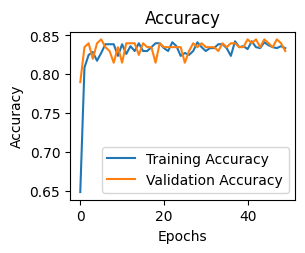

In [181]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

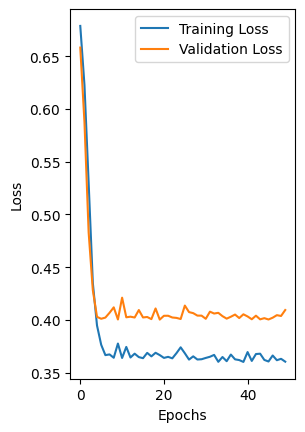

In [182]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


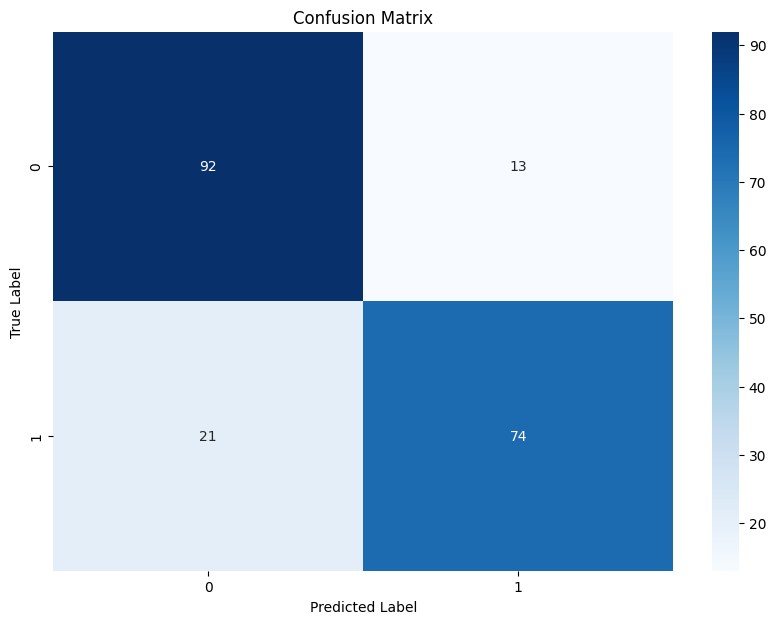

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.85      0.78      0.81        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In [183]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [186]:
df.head()

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,Remote,29,75,78
1,In-Office,45,49,47
2,Remote,34,74,89
3,Remote,25,81,84
4,Remote,50,70,74


In [189]:
sample_input = np.array([[45, 50, 80, 0]])
sample_input_df = pd.DataFrame(sample_input)

In [190]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [192]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_label = le.inverse_transform([predicted_class])

print(f"Kategori produktivitas yang diprediksi: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Kategori produktivitas yang diprediksi: In-Office


## Save Model

In [195]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('remote-work-productivity.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp0344vbl3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140169183390480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183394896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183391440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183393168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183394512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183393744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183395664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140169183388176: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [196]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']